In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
api_token = {"username":"jadidjadid","key":"7c1e7f5f9148a0659bec8238190d818e"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
! kaggle datasets download andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.76G/1.76G [00:13<00:00, 98.1MB/s]
100% 1.76G/1.76G [00:13<00:00, 139MB/s] 


In [5]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [6]:
colon_aca_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_aca"
os.makedirs('/content/model_cell_images/train/colon_aca') 
os.makedirs('/content/model_cell_images/validation/colon_aca')




colon_n_dataset = "/content/lung_colon_image_set/colon_image_sets/colon_n"
os.makedirs('/content/model_cell_images/train/colon_n') 
os.makedirs('/content/model_cell_images/validation/colon_n')

In [7]:
base_dir = '/content/model_cell_images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [8]:
import os
import shutil

colon_aca_train= "/content/model_cell_images/train/colon_aca"
colon_aca_validation= "/content/model_cell_images/validation/colon_aca"

filesun1 = os.listdir(colon_aca_dataset)

# train_len_func = lambda x: int(70/100*len(x)
# memindahkan 70% file
for file in filesun1[0:int(len(filesun1) * .7)]:
  new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_train)
  
filesun2 = os.listdir(colon_aca_dataset)

# memmindahkan sisa(seluruh file)
for file in filesun2:
    new_path = shutil.move(f"{colon_aca_dataset}/{file}", colon_aca_validation)  

In [9]:


colon_n_train= "/content/model_cell_images/train/colon_n"
colon_n_validation= "/content/model_cell_images/validation/colon_n"

filespr1 = os.listdir(colon_n_dataset)

# train_len_func = lambda x: int(70/100*len(x)
# memindahkan 70% file
for file in filespr1[0:int(len(filespr1) * .7)]:
  new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_train)
  
filespr2 = os.listdir(colon_n_dataset)

# memmindahkan sisa(seluruh file)
for file in filespr2:
    new_path = shutil.move(f"{colon_n_dataset}/{file}", colon_n_validation)  

In [10]:
file_train_colon_n = os.listdir(colon_n_train)
file_Val_colon_n = os.listdir(colon_n_validation)
file_train_colon_aca = os.listdir(colon_aca_train)
file_Val_colon_aca = os.listdir(colon_aca_validation)

print("data colon_n train : " + str(len(file_train_colon_n)))
print("data colon_n validation : " + str(len(file_Val_colon_n)))
print("data colon_aca train : " + str(len(file_train_colon_aca)))
print("data colon_aca validation : " + str(len(file_Val_colon_aca)))

print()
print(os.listdir(colon_n_train)[:10])
print(os.listdir(colon_n_validation)[:10])
print(os.listdir(colon_aca_train)[:10])
print(os.listdir(colon_aca_validation)[:10])

data colon_n train : 3500
data colon_n validation : 1500
data colon_aca train : 3500
data colon_aca validation : 1500

['colonn3978.jpeg', 'colonn3546.jpeg', 'colonn229.jpeg', 'colonn2521.jpeg', 'colonn3901.jpeg', 'colonn2845.jpeg', 'colonn4730.jpeg', 'colonn3600.jpeg', 'colonn1492.jpeg', 'colonn2600.jpeg']
['colonn977.jpeg', 'colonn812.jpeg', 'colonn4907.jpeg', 'colonn3217.jpeg', 'colonn162.jpeg', 'colonn2993.jpeg', 'colonn4450.jpeg', 'colonn3935.jpeg', 'colonn1406.jpeg', 'colonn2857.jpeg']
['colonca1842.jpeg', 'colonca2408.jpeg', 'colonca369.jpeg', 'colonca2023.jpeg', 'colonca926.jpeg', 'colonca4065.jpeg', 'colonca220.jpeg', 'colonca1504.jpeg', 'colonca311.jpeg', 'colonca3532.jpeg']
['colonca4447.jpeg', 'colonca3491.jpeg', 'colonca1329.jpeg', 'colonca2288.jpeg', 'colonca669.jpeg', 'colonca3301.jpeg', 'colonca1064.jpeg', 'colonca1910.jpeg', 'colonca4514.jpeg', 'colonca3923.jpeg']


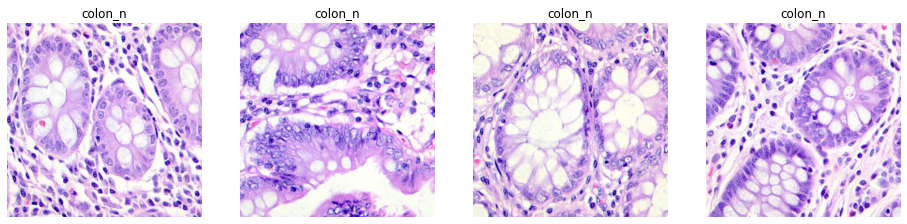

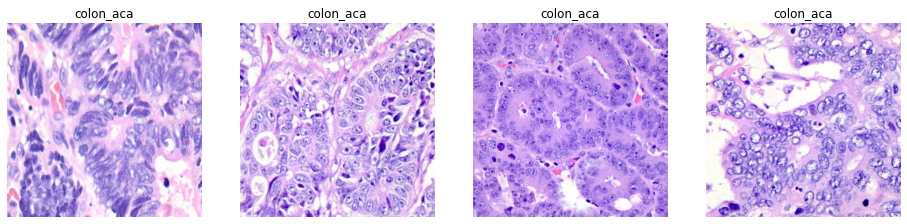

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

colon_n_dir=os.path.join('/content/model_cell_images/train/colon_n')
colon_aca_dir=os.path.join('/content/model_cell_images/train/colon_aca')

colon_n_image = os.listdir(colon_n_dir)
colon_aca_image = os.listdir(colon_aca_dir)

fname1 = [os.path.join(colon_n_dir,fname)
        for fname in colon_n_image[:4]]

fname2 = [os.path.join(colon_aca_dir,fname)
        for fname in colon_aca_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('colon_n')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('colon_aca')
    plt.imshow(img)
    
plt.show()

In [12]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [13]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [14]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (7000, 250, 250, 3)
Train Label =  (7000,)
Validation Data =  (3000, 250, 250, 3)
Validation Label =  (3000,)


In [15]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [238 178 219]
Data setelah di-normalisasi  [0.93333334 0.69803923 0.85882354]


In [16]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

Label sebelum di-encoder  ['colon_n' 'colon_n' 'colon_n' 'colon_n' 'colon_n' 'colon_n' 'colon_n'
 'colon_n' 'colon_n' 'colon_n']


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D

model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D(data_format='channels_last'))
model.add(Flatten())

In [18]:
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       7

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:

H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss maxpol")
plt.plot(np.arange(0, 100), HH.history["loss"], label="train_loss averagepol")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))